# Sentiment analysis 

The objective of this problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [59]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('tweets.csv',encoding= 'unicode_escape')

### Drop null values
- drop all the rows with null values

In [61]:
#checkign the shape of the dataframe
df.shape

(9093, 3)

In [62]:
#checkign the datatype of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [63]:
#checking for null values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [64]:
#we could observe that for the emotion_in_tweet_is_directed_at field there are 5802 null values.

In [65]:
#checkign for unique values
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [66]:
# As emotion_in_tweet_is_directed_at is text column, replacing null values with most frequently occured values

In [67]:
#the most appeared value of emotion_in_tweet_is_directed_at is ipag
df['emotion_in_tweet_is_directed_at'].mode()

0    iPad
dtype: object

In [68]:
#instead of dropping null values replacing null values wiht mode
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna(df['emotion_in_tweet_is_directed_at'].mode()[0])

In [69]:
#the null vlaues are removed
df['emotion_in_tweet_is_directed_at'].isna().sum()

0

In [70]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [71]:
df.isna().sum()

tweet_text                                            1
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [72]:
#dropping the remaining null values from the field tweet_text

In [73]:
df = df.dropna()

In [74]:
df.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [75]:
#shape of the dataframe after removing null value is
df.shape

(9092, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [76]:
#printing first 5 rows of the dataframe
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [77]:
import re
#improting regex function

In [29]:
# df['tweet_text'] = df['tweet_text'].applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
# df['tweet_text'] = df['tweet_text'].applymap(lambda s: s.lower())
# df['tweet_text'] = df['tweet_text'].applymap(lambda s:s.strip())

In [78]:
#converting to lower
df= df.applymap(lambda s: s.lower())

In [79]:
#replacing special characters with blank values
df = df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

In [80]:

df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [81]:
df = df.applymap(lambda s: s.strip())

print dataframe

In [82]:

#checkign the dataframe
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


In [83]:
#pringing the shape
df.shape

(9092, 3)

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [84]:
#chekcing the unique values in dataframe
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['negative emotion', 'positive emotion',
       'no emotion toward brand or product', 'i cant tell'], dtype=object)

In [85]:
#checking for value_counts
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

no emotion toward brand or product    5388
positive emotion                      2978
negative emotion                       570
i cant tell                            156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [86]:
#forming dataframe with only positive and neagtive emotion and removing other empotions
newdf = df.loc[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'positive emotion') | (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'negative emotion')]

In [87]:
newdf

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion
...,...,...,...
9077,mention your pr guy just convinced me to switc...,iphone,positive emotion
9079,quotpapyrussort of like the ipadquot nice lol...,ipad,positive emotion
9080,diller says google tv quotmight be run over by...,other google product or service,negative emotion
9085,ive always used camera+ for my iphone bc it ha...,ipad or iphone app,positive emotion


In [88]:
#chekcign the value counts after deleting the other emotions
newdf['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
#there are 2978 positive emotions and 570 negative emoitions

positive emotion    2978
negative emotion     570
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [41]:
#one way to replace postive emotion and negative emotion with one and zero
di = {'positive emotion':1, 'negative emotion':0}
newdf['is_there_an_emotion_directed_at_a_brand_or_product'] = newdf['is_there_an_emotion_directed_at_a_brand_or_product'].map(di)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#other way to replace positive and negative emotion to one and zero

In [89]:
newdf['is_there_an_emotion_directed_at_a_brand_or_product'] = newdf['is_there_an_emotion_directed_at_a_brand_or_product'].replace("positive emotion",1)

In [90]:
newdf['is_there_an_emotion_directed_at_a_brand_or_product'] = newdf['is_there_an_emotion_directed_at_a_brand_or_product'].replace("negative emotion",0)

In [91]:
# di = {'Positive emotion':1, 'Negative emotion':0}
# df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(di)

In [92]:
newdf.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


In [93]:
newdf['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array([0, 1], dtype=int64)

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [94]:
#forming the featrue
X = newdf['tweet_text']

In [95]:
#forming the label
y = newdf['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
#splitting into train and test
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [98]:
#initializing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),stop_words = 'english',min_df =2)

In [99]:
X_train = vectorizer.fit_transform(X_train)
#fit_transform train data

In [100]:
X_train

<2661x5901 sparse matrix of type '<class 'numpy.int64'>'
	with 41880 stored elements in Compressed Sparse Row format>

In [101]:
X_test = vectorizer.transform(X_test)
#transform test data

In [102]:
print(vectorizer.get_feature_names())

['10', '10 attendees', '10 hot', '10 link', '100', '1000', '101', '101 link', '11', '11ntc', '11ntc sxsw', '12', '12 months', '12b', '12b miles', '136', '136 google', '1413', '15', '15 minute', '15 minutes', '150', '150 million', '1500', '1500 macbook', '15k', '16gb', '16gb wifi', '1986', '1986quot', '1st', '1st prize', '1st time', '20', '20 min', '2011', '2011 computing', '2011 google', '2011 link', '2011 mention', '2011 novelty', '2011 prizes', '2011 weekend', '2011_', '2011_ link', '21', '21 fail', '22', '22 tracks', '247', '247 amp', '247 stream', '250k', '250k new', '2day', '2nd', '2nd place', '2nd prize', '2not', '2not worry', '2quot', '2quot mention', '2s', '2s austin', '2s sxsw', '30', '30 android', '313', '315', '315 details', '330pm', '36', '37', '3d', '3d buildings', '3g', '3g 64mb', '3g ipad', '3gs', '3rd', '3x', '3x speedup', '40', '40 google', '40 use', '40 users', '43', '43 just', '4chan', '4g', '4g austin', '4sq', '4sq sxsw', '4square', '4year', '4year olds', '50', '52'

In [103]:
#the vocabularies are 
vectorizer.vocabulary_

{'theyre': 5241,
 'giving': 1888,
 'away': 549,
 'ipad': 2484,
 '2s': 62,
 'boxes': 746,
 'books': 728,
 'mention': 3255,
 'sxsw': 4860,
 'theyre giving': 5243,
 'giving away': 1889,
 'away ipad': 552,
 'ipad 2s': 2487,
 'mention sxsw': 3410,
 'setting': 4501,
 'ipad2': 2590,
 'service': 4485,
 'morning': 3525,
 'apple': 349,
 'popup': 3978,
 'store': 4739,
 'morning sxsw': 3527,
 'sxsw apple': 4871,
 'apple popup': 387,
 'popup store': 3984,
 'time': 5283,
 'google': 1931,
 'launch': 2849,
 'new': 3597,
 'social': 4607,
 'network': 3588,
 'cnet': 988,
 'news': 3631,
 'link': 2956,
 'google launch': 1967,
 'launch new': 2859,
 'new social': 3619,
 'social network': 4610,
 'network sxsw': 3592,
 'sxsw cnet': 4891,
 'cnet news': 991,
 'news link': 3637,
 'used': 5508,
 'think': 5257,
 'started': 4706,
 'making': 3159,
 'great': 2062,
 'apps': 436,
 'official': 3689,
 'app': 300,
 'site': 4560,
 'mention used': 3428,
 'official sxsw': 3691,
 'sxsw app': 4870,
 'app ipad': 318,
 'hopefully

In [104]:
len(vectorizer.vocabulary_)

5901

In [105]:
#shape of X_train
X_train.shape

(2661, 5901)

In [106]:
#shape of X_test
X_test.shape

(887, 5901)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
#intiializing logisticregression models
lr =  LogisticRegression()


### Fit the classifer
- fit logistic regression classifier

In [109]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [110]:
from sklearn.naive_bayes import MultinomialNB


### Fit the classifer
- fit naive bayes classifier

In [111]:
#initializing multinomialNB model
nb =MultinomialNB()

In [112]:
nb.fit(X_train.toarray(), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [113]:
#Predicitng wiht logistic regression
y_predict = lr.predict(X_test)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [114]:
#predicitng with multinomial nb
y_predictnb = nb.predict(X_test.toarray())

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [115]:
#accuracy score is
accuracy_score(y_predict,y_test)

0.8804960541149943

In [116]:
from sklearn.metrics import confusion_matrix

confusion matrix


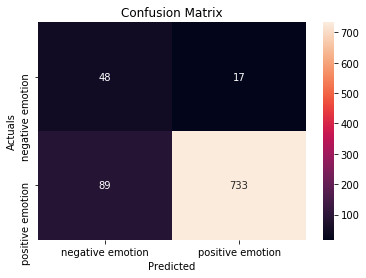

In [117]:
#confusion matrix is 
cm = confusion_matrix(y_predict,y_test)
print('confusion matrix')

class_label = ['negative emotion','positive emotion']
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()
#model is able to classify 733 positive emotions

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [118]:
#accruacy wiht naive bayes
accuracy_score(y_predictnb,y_test)

0.8579481397970687

confusion matrix


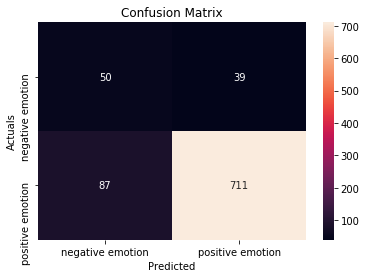

In [119]:
#confusion matrix iwht naive bayes
cm = confusion_matrix(y_predictnb,y_test)
print('confusion matrix')

class_label = ['negative emotion','positive emotion']
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [120]:
#writing a review and loading it to do sentiment analysis

In [133]:
df1 = pd.read_csv('sample.csv')

In [134]:
df1.shape

(3, 1)

In [146]:
df1.head()

,tweet_text
0,got iphone which hangs after opening whatsapp ...
1,didnt like iphone which is of very bad hile pl...
2,ounting down the days to sxsw plus strong anad...


In [135]:
df1 = df1.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))

In [136]:
df1 = df1.applymap(lambda s:s.lower())

In [137]:
df1 = df1.applymap(lambda s:s.strip())

In [138]:
df1.head(1)

,tweet_text
0,got iphone which hangs after opening whatsapp ...


In [139]:
data = df1['tweet_text']

In [140]:
X_testreal = vectorizer.transform(data)

In [141]:
X_testreal.shape

(3, 5901)

In [142]:
X_testreal

<3x5901 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [144]:
y_preidcto = lr.predict(X_testreal)

In [145]:
y_preidcto

array([1, 0, 1], dtype=int64)

In [ ]:
#model is predicting appropriately
